In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
%matplotlib inline

In [3]:
ts = pd.read_csv('billtopsong.csv')

In [4]:
ts['artists'] = ts['artists'].map(lambda i: i.split(' Featuring')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(',')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' &')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' +')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split('Jay Z ')[0])
ts['artists'] = ts['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
counts = pd.DataFrame({'artists':ts.artists.value_counts().index, 'count':ts.artists.value_counts().values})
ts_count = pd.merge(ts, counts, on='artists', how='right')
counts_graph = counts.head(20)

In [123]:
#counts_graph.plot(x='artists', y='count', kind='bar')
#plt.xticks(rotation='vertical')
#plt.show()

In [124]:
#sns.stripplot(x="count", y="artists", data=counts_graph)

In [125]:
#sns.barplot(x="count", y="artists", data=counts_graph)

In [126]:
#sns.swarmplot(x='year',y='artists',data=ts_count)

In [127]:
swarm = ts_count[ts_count['artists'].isin(counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=swarm)

In [16]:
top_artist = pd.read_csv('billtopar.csv')

In [128]:
ta = pd.DataFrame({'artists':top_artist.artists.value_counts().index, 'count':top_artist.artists.value_counts().values})
ta_head = ta.head(20)
#sns.barplot(x="count", y="artists", data=ta_head);

In [129]:
ta_count = pd.merge(ta, top_artist, on='artists', how='right')
swarma = ta_count[ta_count['artists'].isin(ta_head.artists)]
#sns.swarmplot(x='year',y='artists',data=swarma)

In [19]:
all_time = pd.read_csv('billall.csv')
all_time = all_time.rename(columns={'name': 'artists'})

In [61]:
all_time_count = pd.merge(all_time, ta, on='artists', how='right')
all_time_count = all_time_count.head(25)

In [21]:
top_rap = pd.read_csv('billtoprap.csv')

In [22]:
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' Featuring')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(',')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' &')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' +')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split('Jay Z ')[0])
top_rap['artists'] = top_rap['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
rap_counts = pd.DataFrame({'artists':top_rap.artists.value_counts().index, 'count':top_rap.artists.value_counts().values})
tr_count = pd.merge(top_rap, rap_counts, on='artists', how='right')
tr_counts_graph = rap_counts.head(20)

In [130]:
#sns.barplot(x="count", y="artists", data=tr_counts_graph)

In [131]:
rap_swarm = tr_count[tr_count['artists'].isin(tr_counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=rap_swarm)

In [25]:
top_rb = pd.read_csv('billtoprb.csv')

In [26]:
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' Featuring')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(',')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' &')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' +')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split('Jay Z ')[0])
top_rb['artists'] = top_rb['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
rb_counts = pd.DataFrame({'artists':top_rb.artists.value_counts().index, 'count':top_rb.artists.value_counts().values})
trb_count = pd.merge(top_rb, rb_counts, on='artists', how='right')
trb_counts_graph = rb_counts.head(20)

In [132]:
#sns.barplot(x="count", y="artists", data=trb_counts_graph)

In [133]:
swarmrb = trb_count[trb_count['artists'].isin(trb_counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=swarmrb)

In [29]:
top_rock = pd.read_csv('billtoprock.csv')

In [30]:
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' Featuring')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(',')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' &')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' +')[0])
rock_counts = pd.DataFrame({'artists':top_rock.artists.value_counts().index, 'count':top_rock.artists.value_counts().values})
trock_count = pd.merge(top_rock, rock_counts, on='artists', how='right')
trock_counts_graph = rock_counts.head(20)

In [134]:
#sns.barplot(x="count", y="artists", data=trock_counts_graph)

In [135]:
swarmrock = trock_count[trock_count['artists'].isin(trock_counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=swarmrock)

In [33]:
topc = pd.read_csv('billtopcountry.csv')

In [34]:
topc['artists'] = topc['artists'].map(lambda i: i.split(' Featuring')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(',')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(' &')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(' +')[0])
c_counts = pd.DataFrame({'artists':topc.artists.value_counts().index, 'count':topc.artists.value_counts().values})
tc_count = pd.merge(topc, c_counts, on='artists', how='right')
tc_counts_graph = c_counts.head(20)

In [136]:
#sns.barplot(x="count", y="artists", data=tc_counts_graph)

In [137]:
swarmc = tc_count[tc_count['artists'].isin(tc_counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=swarmc)

In [37]:
tope = pd.read_csv('billtopedm.csv')

In [38]:
tope['artists'] = tope['artists'].map(lambda i: i.split(' Featuring')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(',')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(' &')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(' +')[0])
edm_counts = pd.DataFrame({'artists':tope.artists.value_counts().index, 'count':tope.artists.value_counts().values})
te_count = pd.merge(tope, edm_counts, on='artists', how='right')
te_counts_graph = edm_counts.head(20)

In [138]:
#sns.barplot(x="count", y="artists", data=te_counts_graph)

In [139]:
swarme = te_count[te_count['artists'].isin(te_counts_graph.artists)]
#sns.swarmplot(x='year',y='artists',data=swarme)

In [41]:
singer_gender = pd.read_csv('singers_gender.csv',encoding='latin-1')
singer_gender = singer_gender.rename(columns={'artist': 'artists'})
singer_gender['artists'] = singer_gender['artists'].str.upper()

In [122]:
tsmerge = counts_graph.copy()
tsmerge['artists'] = tsmerge['artists'].str.upper()

In [43]:
#a = singer_gender[singer_gender.artists.map(lambda x: re.match('SEAN*', x)!= None)]

In [111]:
joints = pd.merge(tsmerge, singer_gender, on='artists', how='left')
joints['gender'].loc[joints['artists']=='BEYONCE'] = joints['gender'].loc[joints['artists']=='BEYONCE'].replace(to_replace=np.nan, value = 'female')
joints['gender'] = joints['gender'].fillna('group')

/Users/xiaoweicheng/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [112]:
jointsgender = pd.DataFrame({'gender':joints.gender.value_counts().index, 'count':joints.gender.value_counts().values})

In [140]:
#sns.swarmplot(x="count", y="gender",data=joints)

In [141]:
#sns.barplot(x="gender", y="count",data=jointsgender)

In [108]:
tamerge = ta_head.copy()
tamerge['artists'] = tamerge['artists'].str.upper()
jointa = pd.merge(tamerge, singer_gender, on='artists', how='left')
jointa['gender'].loc[jointa['artists']=='PITBULL'] = jointa['gender'].loc[jointa['artists']=='PITBULL'].replace(to_replace=np.nan, value = 'male')
jointa['gender'].loc[jointa['artists']=='BEYONCE'] = jointa['gender'].loc[jointa['artists']=='BEYONCE'].replace(to_replace=np.nan, value = 'female')
jointa['gender'] = jointa['gender'].fillna('group')


/Users/xiaoweicheng/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [142]:
#sns.swarmplot(x="count", y="gender",data=jointa)

In [143]:
jointagender = pd.DataFrame({'gender':jointa.gender.value_counts().index, 'count':jointa.gender.value_counts().values})
#sns.barplot(x="gender", y="count",data=jointagender)

In [87]:
allmerge = all_time.copy()
allmerge['artists'] = allmerge['artists'].str.upper()
joinall = pd.merge(allmerge, singer_gender, on='artists', how='left')

In [88]:
joinall['gender'] = joinall['gender'].fillna('group')

In [89]:
joinallgender = pd.DataFrame({'gender':joinall.gender.value_counts().index, 'count':joinall.gender.value_counts().values})

In [144]:
#sns.barplot(x="gender", y="count",data=joinallgender)

In [148]:
trapmerge = tr_counts_graph.copy()
trapmerge['artists'] = trapmerge['artists'].str.upper()
jointrap = pd.merge(trapmerge, singer_gender, on='artists', how='left')
jointrap['gender'].loc[jointrap['artists']=='PITBULL'] = jointrap['gender'].loc[jointrap['artists']=='PITBULL'].replace(to_replace=np.nan, value = 'male')
jointrap['gender'].loc[jointrap['artists']=='DJ KHALED'] = jointrap['gender'].loc[jointrap['artists']=='DJ KHALED'].replace(to_replace=np.nan, value = 'male')
jointrap['gender'].loc[jointrap['artists']=='IGGY AZALEA'] = jointrap['gender'].loc[jointrap['artists']=='IGGY AZALEA'].replace(to_replace=np.nan, value = 'female')
jointrap['gender'].loc[jointrap['artists']=='JAY-Z'] = jointrap['gender'].loc[jointrap['artists']=='JAY-Z'].replace(to_replace=np.nan, value = 'male')
jointrap['gender'] = jointrap['gender'].fillna('group')
jointrapgender = pd.DataFrame({'gender':jointrap.gender.value_counts().index, 'count':jointrap.gender.value_counts().values})

/Users/xiaoweicheng/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [150]:
#sns.barplot(x="gender", y="count",data=jointrapgender)

In [153]:
trbmerge = trb_counts_graph.copy()
trbmerge['artists'] = trbmerge['artists'].str.upper()
jointrb = pd.merge(trbmerge, singer_gender, on='artists', how='left')
jointrb['gender'].loc[jointrb['artists']=='DJ KHALED'] = jointrb['gender'].loc[jointrb['artists']=='DJ KHALED'].replace(to_replace=np.nan, value = 'male')
jointrb['gender'].loc[jointrb['artists']=='JAY-Z'] = jointrb['gender'].loc[jointrb['artists']=='JAY-Z'].replace(to_replace=np.nan, value = 'male')
jointrb['gender'].loc[jointrb['artists']=='BEYONCE'] = jointrb['gender'].loc[jointrb['artists']=='BEYONCE'].replace(to_replace=np.nan, value = 'female')
jointrb['gender'].loc[jointrb['artists']=='THE WEEKND'] = jointrb['gender'].loc[jointrb['artists']=='THE WEEKND'].replace(to_replace=np.nan,value = 'male')
jointrbgender = pd.DataFrame({'gender':jointrb.gender.value_counts().index, 'count':jointrb.gender.value_counts().values})


/Users/xiaoweicheng/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [155]:
#sns.barplot(x="gender", y="count",data=jointrbgender)

In [160]:
trockmerge = trock_counts_graph.copy()
trockmerge['artists'] = trockmerge['artists'].str.upper()
jointrock = pd.merge(trockmerge, singer_gender, on='artists', how='left')
jointrock['gender'] = jointrock['gender'].fillna('group')
jointrockgender = pd.DataFrame({'gender':jointrock.gender.value_counts().index, 'count':jointrock.gender.value_counts().values})


In [162]:
#sns.barplot(x="gender", y="count",data=jointrockgender)

In [167]:
tcmerge = tc_counts_graph.copy()
tcmerge['artists'] = tcmerge['artists'].str.upper()
jointc = pd.merge(tcmerge, singer_gender, on='artists', how='left')
jointc['gender'] = jointc['gender'].fillna('group')
jointcgender = pd.DataFrame({'gender':jointc.gender.value_counts().index, 'count':jointc.gender.value_counts().values})


In [168]:
#sns.barplot(x="gender", y="count",data=jointcgender)

In [190]:
temerge = te_counts_graph.copy()
temerge['artists'] = temerge['artists'].str.upper()
jointe = pd.merge(temerge, singer_gender, on='artists', how='left')

jointe['gender'].loc[jointe['artists']=='AVICII'] = jointe['gender'].loc[jointe['artists']=='AVICII'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='DAVID GUETTA'] = jointe['gender'].loc[jointe['artists']=='DAVID GUETTA'].replace(to_replace=np.nan,value = 'male')
jointe['gender'].loc[jointe['artists']=='ZEDD'] = jointe['gender'].loc[jointe['artists']=='ZEDD'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='DJ SNAKE'] = jointe['gender'].loc[jointe['artists']=='DJ SNAKE'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='STEVE AOKI'] = jointe['gender'].loc[jointe['artists']=='STEVE AOKI'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='KYGO'] = jointe['gender'].loc[jointe['artists']=='KYGO'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='SKRILLEX'] = jointe['gender'].loc[jointe['artists']=='SKRILLEX'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='MARTIN GARRIX'] = jointe['gender'].loc[jointe['artists']=='MARTIN GARRIX'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='AFROJACK'] = jointe['gender'].loc[jointe['artists']=='AFROJACK'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='ALESSO'] = jointe['gender'].loc[jointe['artists']=='ALESSO'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='TIESTO'] = jointe['gender'].loc[jointe['artists']=='TIESTO'].replace(to_replace=np.nan, value = 'male')
jointe['gender'].loc[jointe['artists']=='PSY'] = jointe['gender'].loc[jointe['artists']=='PSY'].replace(to_replace=np.nan, value = 'male')
jointe['gender'] = jointe['gender'].fillna('group')
jointegender = pd.DataFrame({'gender':jointe.gender.value_counts().index, 'count':jointe.gender.value_counts().values})
jointe


/Users/xiaoweicheng/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,artists,count,gender,category
0,CALVIN HARRIS,21,male,Scottish_male_singers
1,AVICII,15,male,NaN
2,DAVID GUETTA,12,male,NaN
3,THE CHAINSMOKERS,12,group,NaN
4,ZEDD,10,male,NaN
5,DJ SNAKE,10,male,NaN
6,DISCLOSURE,9,group,NaN
7,MAJOR LAZER,9,group,NaN
8,DAFT PUNK,8,group,NaN
9,STEVE AOKI,7,male,NaN


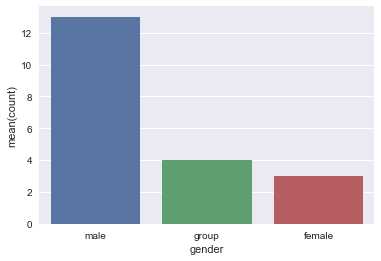

In [171]:
#sns.barplot(x="gender", y="count",data=jointegender)

In [77]:
#from os import path
#from wordcloud import WordCloud

In [90]:
#a = ts['artists'].astype(str)
#tuples = tuple([tuple(x) for x in ts['artists'].text.value_counts().reset_index().values])


In [91]:
#wordcloud = WordCloud().generate(a)